In [1]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [4]:
def reDefineDVCS(df_epg):

    df_epg.loc[:, 'newPe'] = df_epg.t2/2/M + M
    df_epg.loc[:, 'newPp'] = np.sqrt(df_epg.newPe**2 - M**2)
    df_epg.loc[:, 'newGp'] = df_epg.nu - df_epg.t2/M/2
    
    df_epg.loc[:, 'dPp'] = df_epg.loc[:, 'newPp'] -  df_epg.loc[:, 'Pp']
    df_epg.loc[:, 'dGp'] = df_epg.loc[:, 'newGp'] -  df_epg.loc[:, 'Gp']

    return df_epg

In [176]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/nov2021/convPkl/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/nov2021/convPkl/exp/"

# df_3063_corr = pd.read_pickle(parent_MC + "3063.pkl")
df_3987_corr = pd.read_pickle(parent_MC + "3987.pkl")
# df_3284_1g_corr = pd.read_pickle(parent_MC_bkg1g + "3284.pkl")
# df_3284_2g_corr = pd.read_pickle(parent_MC_bkg2g + "3284.pkl")
df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [177]:
dvcsSimInb = df_3987_corr
bkgSimInb = df_4076_1g_corr
pi0SimInb = df_4076_2g_corr
# dvcsSimInb = df_3063_corr
# bkgSimInb = df_3284_1g_corr
# pi0SimInb = df_3284_2g_corr

In [178]:
epgExpInbFD = copy(exp_1g_corr.loc[(exp_1g_corr.Ee>2)&(exp_1g_corr.Ge>3)&((exp_1g_corr.Psector<7)&(exp_1g_corr.Ptheta<32))& (exp_1g_corr.Gsector<7)])
pi0ExpInbFD = copy(exp_2g_corr.loc[(exp_2g_corr.Ee>2)&(exp_2g_corr.Ge>3)&((exp_2g_corr.Psector<7)&(exp_2g_corr.Ptheta<32))& (exp_2g_corr.Gsector<7)])
dvcsSimInbFD = copy(dvcsSimInb.loc[(dvcsSimInb.Ee>2)&(dvcsSimInb.Ge>3)&((dvcsSimInb.Psector<7)&(dvcsSimInb.Ptheta<32))& (dvcsSimInb.Gsector<7)])
bkgSimInbFD = copy(bkgSimInb.loc[(bkgSimInb.Ee>2)&(bkgSimInb.Ge>3)&((bkgSimInb.Psector<7)&(bkgSimInb.Ptheta<32))& (bkgSimInb.Gsector<7)])
pi0SimInbFD = copy(pi0SimInb.loc[(pi0SimInb.Ee>2)&(pi0SimInb.Ge>3)&((pi0SimInb.Psector<7)&(pi0SimInb.Ptheta<32))& (pi0SimInb.Gsector<7)& (pi0SimInb.Gsector2<7)])

epgExpInbCD = copy(exp_1g_corr.loc[(exp_1g_corr.Ee>2)&(exp_1g_corr.Ge>3)&(exp_1g_corr.Pp>0.25)&(exp_1g_corr.Pp<0.8)&((exp_1g_corr.Psector>7)&(exp_1g_corr.Ptheta<60))& (exp_1g_corr.Gsector<7)])
pi0ExpInbCD = copy(exp_2g_corr.loc[(exp_2g_corr.Ee>2)&(exp_2g_corr.Ge>3)&(exp_2g_corr.Pp>0.25)&(exp_2g_corr.Pp<0.8)&((exp_2g_corr.Psector>7)&(exp_2g_corr.Ptheta<60))& (exp_2g_corr.Gsector<7)& (exp_2g_corr.Gsector2<7)])
dvcsSimInbCD = copy(dvcsSimInb.loc[(dvcsSimInb.Ee>2)&(dvcsSimInb.Ge>3)&(dvcsSimInb.Pp>0.25)&(dvcsSimInb.Pp<0.8)&((dvcsSimInb.Psector>7)&(dvcsSimInb.Ptheta<60))& (dvcsSimInb.Gsector<7)])
bkgSimInbCD = copy(bkgSimInb.loc[(bkgSimInb.Ee>2)&(bkgSimInb.Ge>3)&(bkgSimInb.Pp>0.25)&(bkgSimInb.Pp<0.8)&((bkgSimInb.Psector>7)&(bkgSimInb.Ptheta<60))& (bkgSimInb.Gsector<7)])
pi0SimInbCD = copy(pi0SimInb.loc[(pi0SimInb.Ee>2)&(pi0SimInb.Ge>3)&(pi0SimInb.Pp>0.25)&(pi0SimInb.Pp<0.8)&((pi0SimInb.Psector>7)&(pi0SimInb.Ptheta<60))& (pi0SimInb.Gsector<7)])

epgExpInbCDFT = exp_1g_corr.loc[(exp_1g_corr.Ee>2)&(exp_1g_corr.Ge>3)&(exp_1g_corr.Pp>0.25)&(exp_1g_corr.Pp<0.8)&((exp_1g_corr.Psector>7)&(exp_1g_corr.Ptheta<60))& (exp_1g_corr.Gsector>7)]
pi0ExpInbCDFT = exp_2g_corr.loc[(exp_2g_corr.Ee>2)&(exp_2g_corr.Ge>3)&(exp_2g_corr.Pp>0.25)&(exp_2g_corr.Pp<0.8)&((exp_2g_corr.Psector>7)&(exp_2g_corr.Ptheta<60))& (exp_2g_corr.Gsector>7)& (exp_2g_corr.Gsector2>7)]
dvcsSimInbCDFT = dvcsSimInb.loc[(dvcsSimInb.Ee>2)&(dvcsSimInb.Ge>3)&(dvcsSimInb.Pp>0.25)&(dvcsSimInb.Pp<0.8)&((dvcsSimInb.Psector>7)&(dvcsSimInb.Ptheta<60))& (dvcsSimInb.Gsector>7)]
bkgSimInbCDFT = bkgSimInb.loc[(bkgSimInb.Ee>2)&(bkgSimInb.Ge>3)&(bkgSimInb.Pp>0.25)&(bkgSimInb.Pp<0.8)&((bkgSimInb.Psector>7)&(bkgSimInb.Ptheta<60))& (bkgSimInb.Gsector>7)]
pi0SimInbCDFT = pi0SimInb.loc[(pi0SimInb.Ee>2)&(pi0SimInb.Ge>3)&(pi0SimInb.Pp>0.25)&(pi0SimInb.Pp<0.8)&((pi0SimInb.Psector>7)&(pi0SimInb.Ptheta<60))& (pi0SimInb.Gsector>7)]


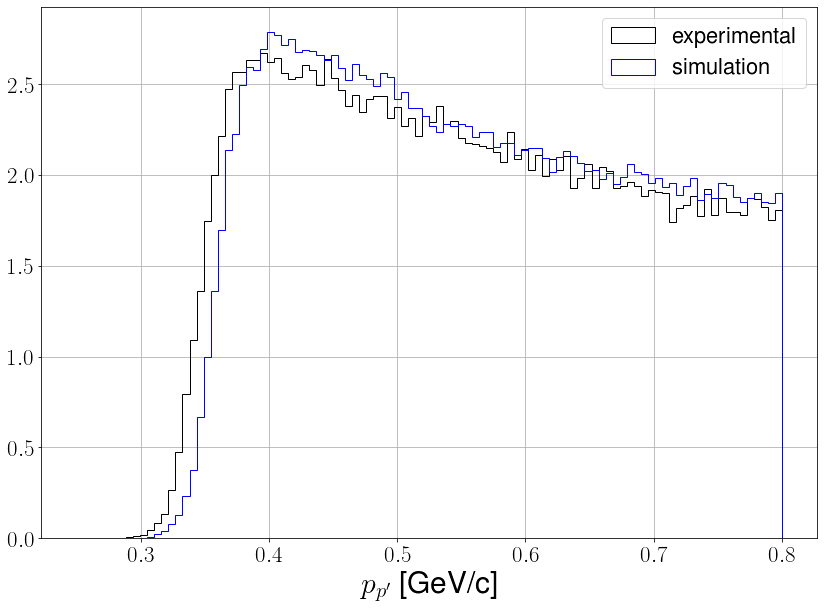

In [25]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
epgExpInbCDFT.Pp.hist(bins = np.linspace(0.25, 0.8, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
dvcsSimInbCDFT.Pp.hist(bins = np.linspace(0.25, 0.8, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$p_{p'}$" + " ["+GeVc+"]")
plt.show()

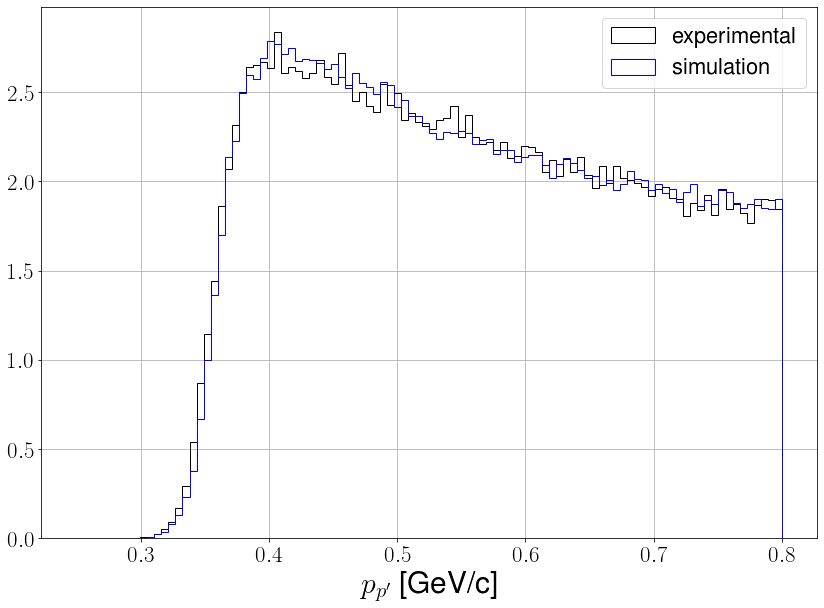

In [26]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
(epgExpInbCDFT.Pp + 0.01).hist(bins = np.linspace(0.25, 0.8, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
dvcsSimInbCDFT.Pp.hist(bins = np.linspace(0.25, 0.8, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$p_{p'}$" + " ["+GeVc+"]")
plt.show()

In [65]:
ver = "CDcorr"

parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_"+ver+"/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_"+ver+"/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/nov2021/convPkl_"+ver+"/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/nov2021/convPkl_"+ver+"/exp/"

df_3987_corr = pd.read_pickle(parent_MC + "3987.pkl")
df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
exp_1g_corr = pd.read_pickle(parent_exp + "dvcs_050.pkl")
exp_2g_corr = pd.read_pickle(parent_exp + "pi0_050.pkl")

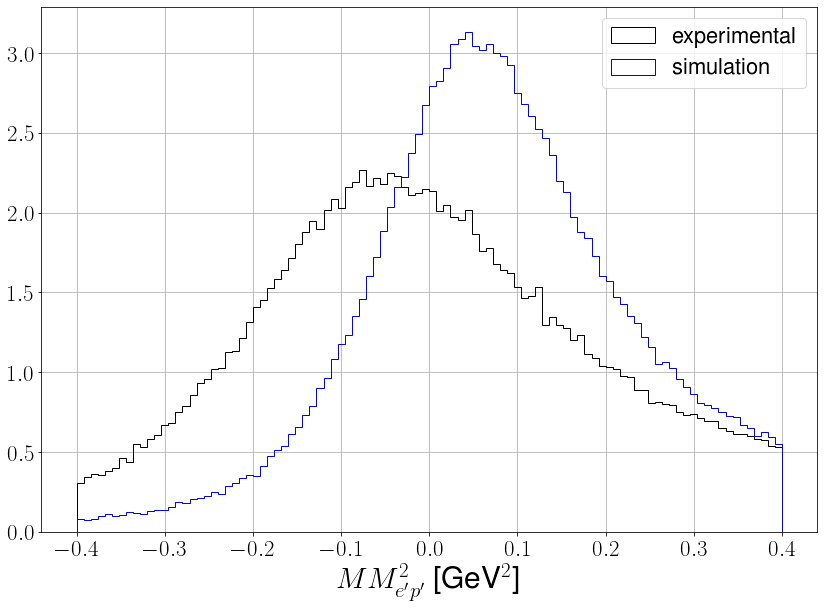

In [29]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
epgExpInbCDFT.MM2_ep.hist(bins = np.linspace(-0.4, 0.4, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
dvcsSimInbCDFT.MM2_ep.hist(bins = np.linspace(-0.4, 0.4, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$MM^2_{e'p'}$" + " ["+GeV2+"]")
plt.show()

In [66]:
epgExpInb = copy(exp_1g_corr)
pi0ExpInb = copy(exp_2g_corr)
dvcsSimInb = copy(df_3987_corr)
bkgSimInb = copy(df_4076_1g_corr)
pi0SimInb = copy(df_4076_2g_corr)

In [67]:
epgExpInbCDFT = epgExpInb.loc[(exp_1g_corr.Ee>2)&(exp_1g_corr.Ge>3)&(exp_1g_corr.Pp>0.25)&(exp_1g_corr.Pp<0.8)&((exp_1g_corr.Psector>7)&(exp_1g_corr.Ptheta<60))& (exp_1g_corr.Gsector>7)]
pi0ExpInbCDFT = pi0ExpInb.loc[(exp_2g_corr.Ee>2)&(exp_2g_corr.Ge>3)&(exp_2g_corr.Pp>0.25)&(exp_2g_corr.Pp<0.8)&((exp_2g_corr.Psector>7)&(exp_2g_corr.Ptheta<60))& (exp_2g_corr.Gsector>7)& (exp_2g_corr.Gsector2>7)]
dvcsSimInbCDFT = dvcsSimInb.loc[(dvcsSimInb.Ee>2)&(dvcsSimInb.Ge>3)&(dvcsSimInb.Pp>0.25)&(dvcsSimInb.Pp<0.8)&((dvcsSimInb.Psector>7)&(dvcsSimInb.Ptheta<60))& (dvcsSimInb.Gsector>7)]
bkgSimInbCDFT = bkgSimInb.loc[(bkgSimInb.Ee>2)&(bkgSimInb.Ge>3)&(bkgSimInb.Pp>0.25)&(bkgSimInb.Pp<0.8)&((bkgSimInb.Psector>7)&(bkgSimInb.Ptheta<60))& (bkgSimInb.Gsector>7)]
pi0SimInbCDFT = pi0SimInb.loc[(pi0SimInb.Ee>2)&(pi0SimInb.Ge>3)&(pi0SimInb.Pp>0.25)&(pi0SimInb.Pp<0.8)&((pi0SimInb.Psector>7)&(pi0SimInb.Ptheta<60))& (pi0SimInb.Gsector>7)]

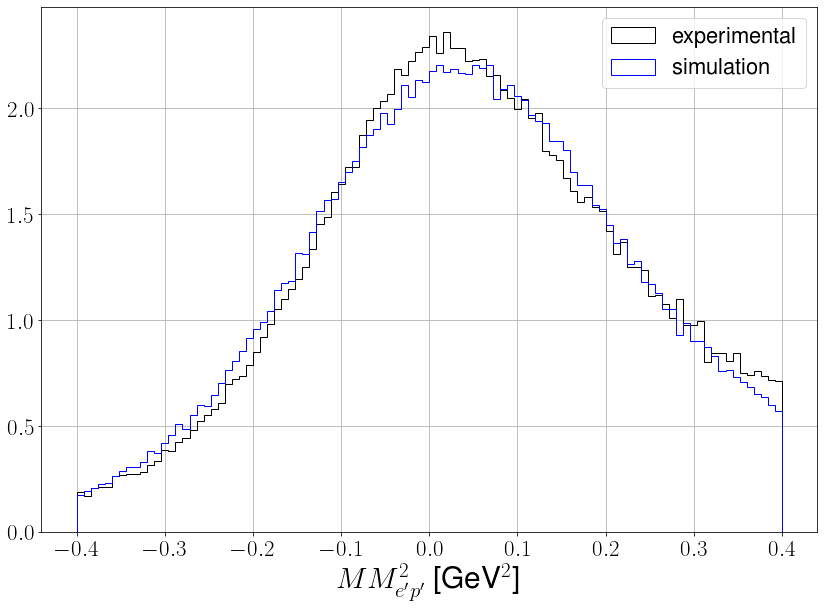

In [37]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
epgExpInbCDFT.MM2_ep.hist(bins = np.linspace(-0.4, 0.4, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
dvcsSimInbCDFT.MM2_ep.hist(bins = np.linspace(-0.4, 0.4, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$MM^2_{e'p'}$" + " ["+GeV2+"]")
plt.show()

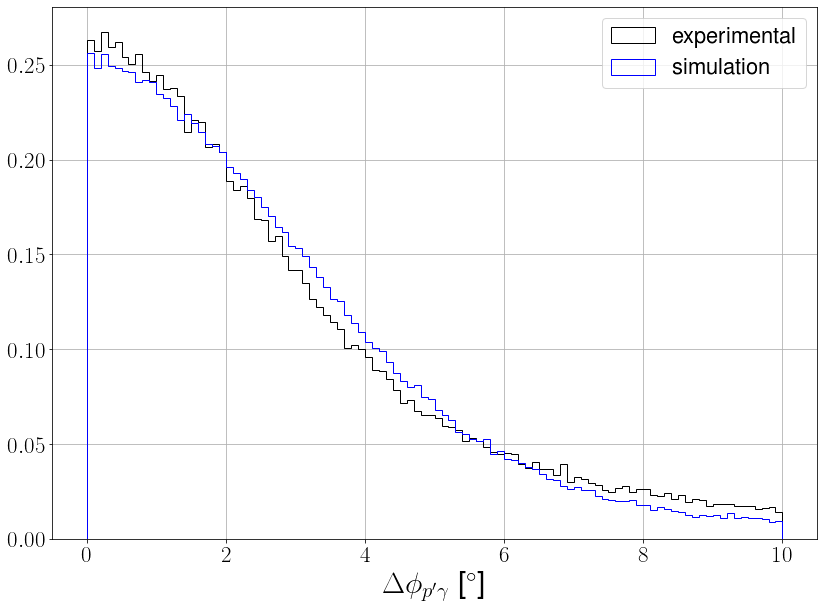

In [68]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
epgExpInbCDFT.coplanarity.hist(bins = np.linspace(0, 10, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
dvcsSimInbCDFT.coplanarity.hist(bins = np.linspace(0, 10, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$\Delta\phi_{p'\gamma}$" + " ["+degree+"]")
plt.show()

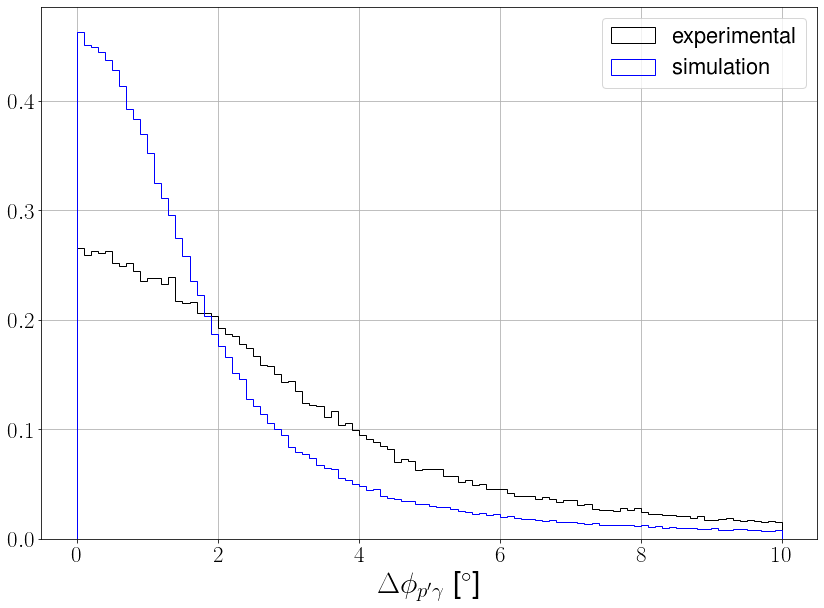

In [64]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
epgExpInbCDFT.coplanarity.hist(bins = np.linspace(0, 10, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
dvcsSimInbCDFT.coplanarity.hist(bins = np.linspace(0, 10, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$\Delta\phi_{p'\gamma}$" + " ["+degree+"]")
plt.show()

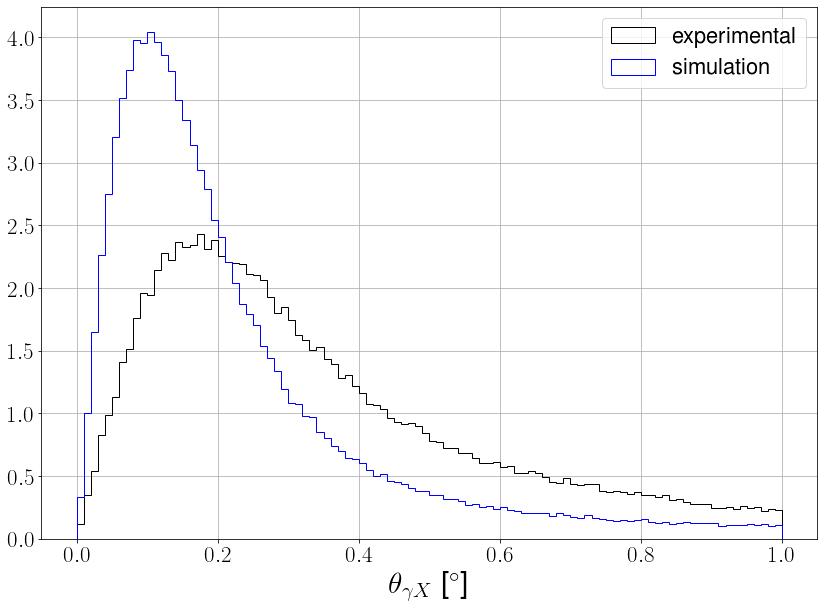

In [76]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
epgExpInbCDFT.reconGam.hist(bins = np.linspace(0, 1, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
dvcsSimInbCDFT.reconGam.hist(bins = np.linspace(0, 1, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$\theta_{\gamma X}$" + " ["+degree+"]")
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
epgExpInbCDFT.reconGam.hist(bins = np.linspace(0, 1, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
dvcsSimInbCDFT.reconGam.hist(bins = np.linspace(0, 1, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$\theta_{\gamma X}$" + " ["+degree+"]")
plt.show()

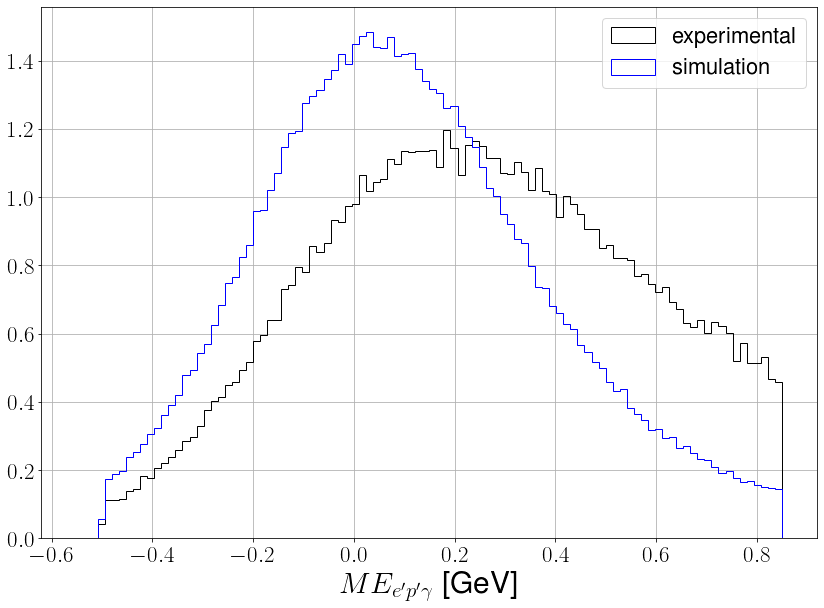

In [90]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
epgExpInbCD.ME_epg.hist(bins = np.linspace(-.55, .85, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
dvcsSimInbCD.ME_epg.hist(bins = np.linspace(-.55, .85, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$ME_{e'p'\gamma}$" + " ["+GeV+"]")
plt.show()

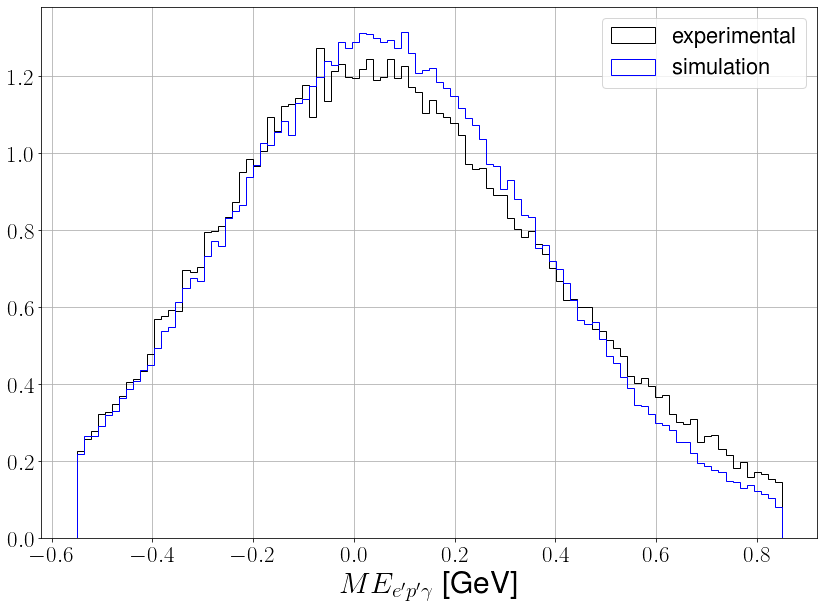

In [93]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
epgExpInbCD.ME_epg.hist(bins = np.linspace(-.55, .85, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
dvcsSimInbCD.ME_epg.hist(bins = np.linspace(-.55, .85, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$ME_{e'p'\gamma}$" + " ["+GeV+"]")
plt.show()

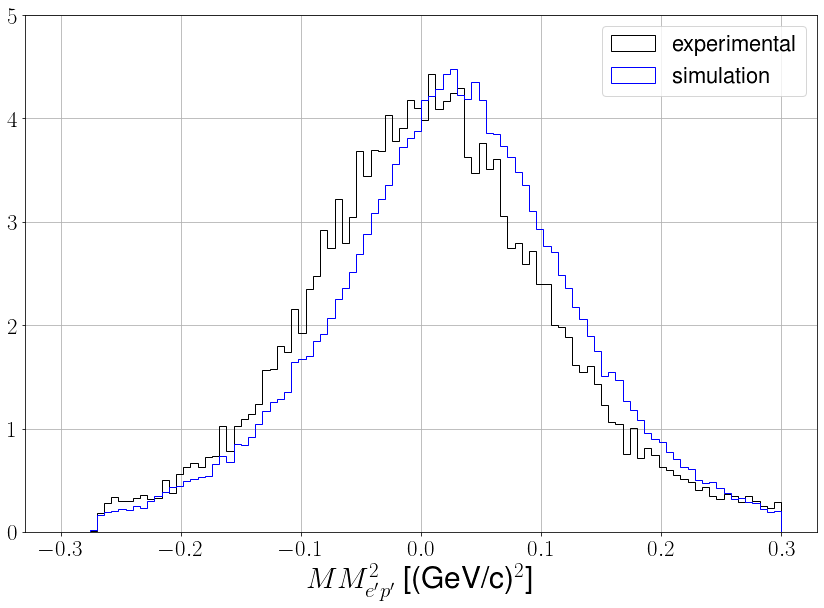

In [175]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
pi0ExpInbFD.MM2_ep.hist(bins = np.linspace(-0.3, 0.3, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
pi0SimInbFD.MM2_ep.hist(bins = np.linspace(-0.3, 0.3, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$MM^2_{e'p'}$" + " ["+GeVc2+"]")
plt.ylim([0, 5])
plt.show()

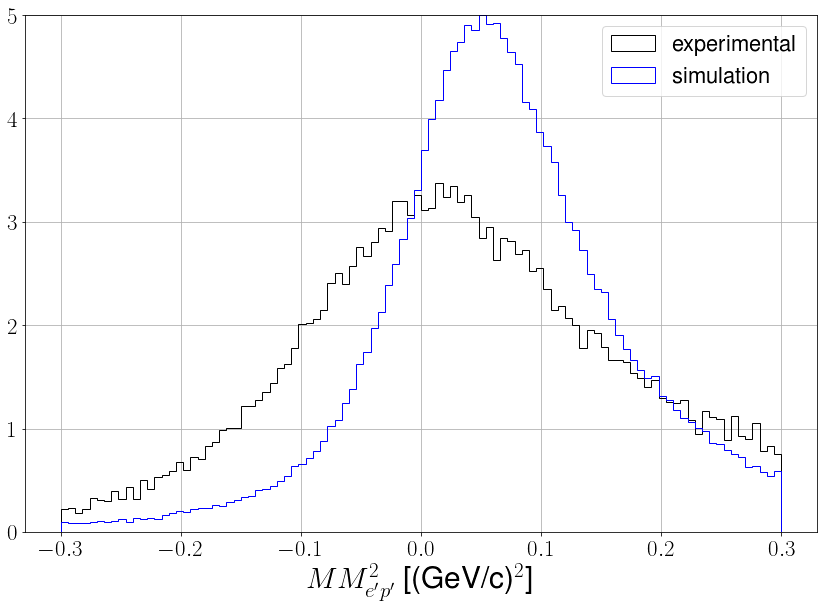

In [179]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
pi0ExpInbFD.MM2_ep.hist(bins = np.linspace(-0.3, 0.3, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
pi0SimInbFD.MM2_ep.hist(bins = np.linspace(-0.3, 0.3, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$MM^2_{e'p'}$" + " ["+GeVc2+"]")
plt.ylim([0, 5])
plt.show()

In [106]:
pi0ExpInbFD1 = copy(pi0ExpInbFD)

In [41]:
x = np.linspace(0.3, 1, 101)

Text(0, 0.5, "$X(p_{p'})$ \\%")

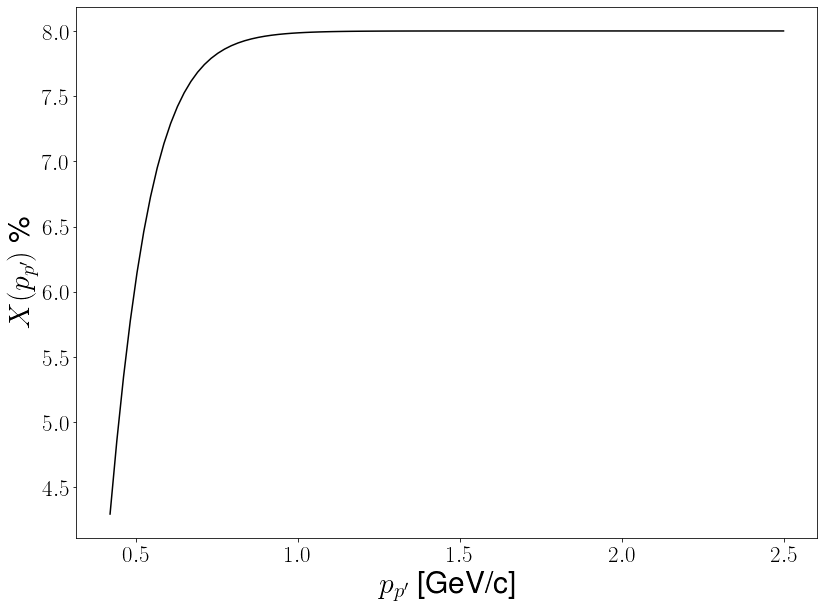

In [171]:
plt.plot(x, 100*np.abs(0.16*(1/(1+np.exp(-(x-0.3)/0.1))-0.5)), color = 'k')
plt.xlabel(r"$p_{p'}$" + " ["+GeVc+"]")
plt.ylabel(r"$X(p_{p'})$" + " \%")


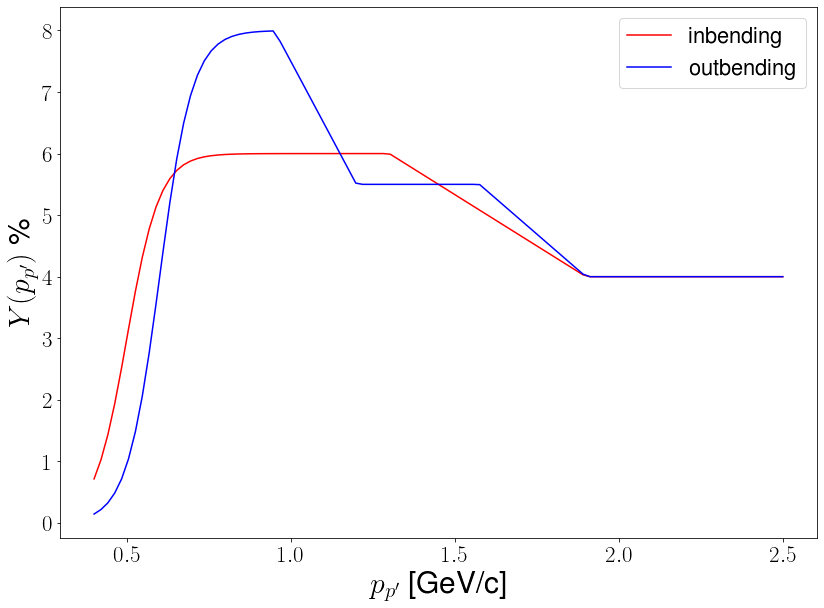

In [172]:
x = np.linspace(0.4, 2.5, 101)
plt.plot(x, 100*Y1, color = 'r', label = 'inbending')
plt.plot(x, 100*Y2, color = 'b', label = 'outbending')
plt.xlabel(r"$p_{p'}$" + " ["+GeVc+"]")
plt.ylabel(r"$Y(p_{p'})$" + " \%")
plt.legend(loc = 'upper right')

In [140]:
A1 = 58.62412832*(x-0.42)**4.35483964*np.exp(-10.03753023*(x-0.42))
A2 = - 0.02 + x*0

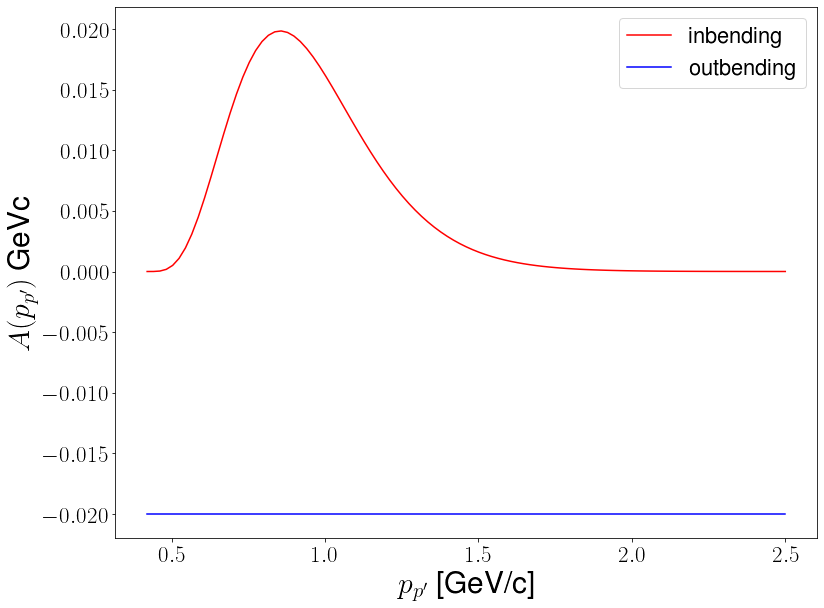

In [173]:
x = np.linspace(0.42, 2.5, 101)
plt.plot(x, A1, color = 'r', label = 'inbending')
plt.plot(x, A2, color = 'b', label = 'outbending')
plt.xlabel(r"$p_{p'}$" + " ["+GeVc+"]")
plt.ylabel(r"$A(p_{p'})$" + " GeVc")
plt.legend(loc = 'upper right')

In [123]:
Y1 = np.select([x<1.3, (x>=1.3) & (x<1.9), x>=1.9], [0.06, -(0.06-0.04)/(1.9-1.3)*x+(0.06-0.04)/(1.9-1.3)*1.9+0.04, 0.04])*(1/(1+np.exp(-(x-0.5)/0.05)))
Y2 = np.select([x<.95, (x>=.95) & (x<1.2), (x>=1.2)&(x<1.575), (x>=1.575) & (x<1.9), (x>1.9)], [0.08, -0.025/(1.2-.95)*x+1.2*0.025/(1.2-.95) + 0.055, 0.055, -0.015/(1.9-1.575)*x+1.9*0.015/(1.9-1.575) + 0.04,0.04])*(1/(1+np.exp(-(x-0.6)/0.05)))

In [124]:
Y1

array([0.00715218, 0.01024773, 0.01432004, 0.01938025, 0.02524054,
       0.03149875, 0.03762887, 0.04314598, 0.04774558, 0.05134181,
       0.05401497, 0.05592826, 0.05726093, 0.05817168, 0.05878602,
       0.05919678, 0.05946982, 0.05965059, 0.05976996, 0.05984865,
       0.05990047, 0.05993457, 0.05995699, 0.05997173, 0.05998143,
       0.05998779, 0.05999198, 0.05999473, 0.05999654, 0.05999772,
       0.05999851, 0.05999902, 0.05999935, 0.05999958, 0.05999972,
       0.05999982, 0.05999988, 0.05999992, 0.05999995, 0.05999997,
       0.05999998, 0.05999999, 0.05999999, 0.05989999, 0.0592    ,
       0.0585    , 0.0578    , 0.0571    , 0.0564    , 0.0557    ,
       0.055     , 0.0543    , 0.0536    , 0.0529    , 0.0522    ,
       0.0515    , 0.0508    , 0.0501    , 0.0494    , 0.0487    ,
       0.048     , 0.0473    , 0.0466    , 0.0459    , 0.0452    ,
       0.0445    , 0.0438    , 0.0431    , 0.0424    , 0.0417    ,
       0.041     , 0.0403    , 0.04      , 0.04      , 0.04   

In [180]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/inb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/inb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/inb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/inb/exp/"

#epg Exp
exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")

# Rec
df_3987_corr = pd.read_pickle(parent_MC + "3987.pkl")
df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")

# df_3987_corr = pd.read_pickle(parent_MC + "3987_075.pkl")
# df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076_075.pkl")
# df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076_075.pkl")
#bkg2g Exp
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [181]:
epgExpInb = copy(exp_1g_corr)
pi0ExpInb = copy(exp_2g_corr)
dvcsSimInb = df_3987_corr#pd.concat([df_3987_corr, df_4124_corr, df_4139_corr, df_4181_corr, df_4182_corr])
bkgSimInb = df_4076_1g_corr#pd.concat([df_4076_1g_corr, df_4202_1g_corr, df_4209_1g_corr])
pi0SimInb = df_4076_2g_corr#pd.concat([df_4076_2g_corr, df_4202_2g_corr, df_4209_2g_corr])

epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]
pi0ExpInbCDFT = pi0ExpInb.loc[(pi0ExpInb.config == 3)]
pi0SimInbCDFT = pi0SimInb.loc[(pi0SimInb.config == 3)]

epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
dvcsSimInbCD = dvcsSimInb.loc[dvcsSimInb.config == 2]
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.config == 2]
pi0ExpInbCD = pi0ExpInb.loc[(pi0ExpInb.config == 2)]
pi0SimInbCD = pi0SimInb.loc[(pi0SimInb.config == 2)]

epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]
dvcsSimInbFD = dvcsSimInb.loc[dvcsSimInb.config == 1]
bkgSimInbFD = bkgSimInb.loc[bkgSimInb.config == 1]
pi0ExpInbFD = pi0ExpInb.loc[(pi0ExpInb.config == 1)]
pi0SimInbFD = pi0SimInb.loc[(pi0SimInb.config == 1)]

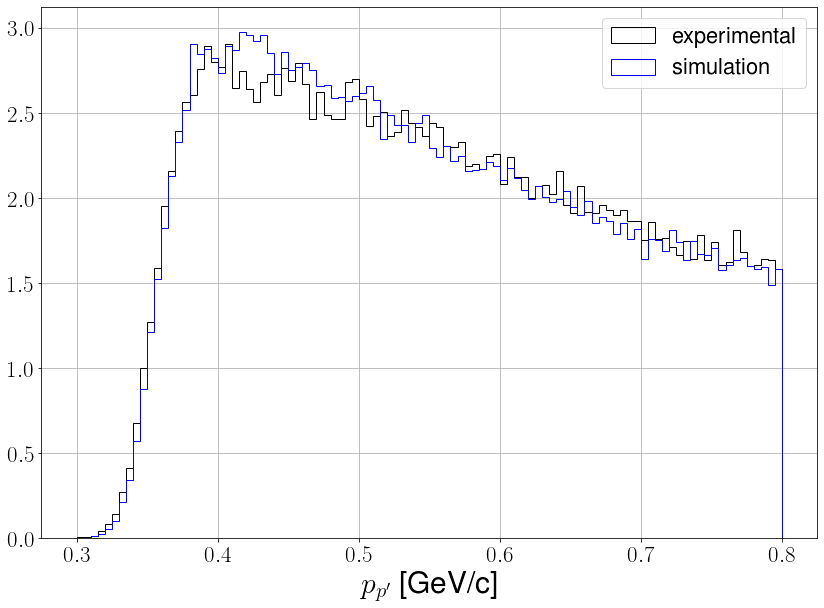

In [183]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
epgExpInbCDFT.Pp.hist(bins = np.linspace(0.3, 0.8, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
dvcsSimInbCDFT.Pp.hist(bins = np.linspace(0.3, 0.8, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$p_{p'}$" + " ["+GeVc+"]")
plt.show()

In [160]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/outb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/outb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/outb/exp/"

df_4240_corr = pd.read_pickle(parent_MC + "4240.pkl")
df_4243_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
df_4243_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")

exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [161]:
epgExpOutb = copy(exp_1g_corr)
pi0ExpOutb = copy(exp_2g_corr)
dvcsSimOutb = df_4240_corr
bkgSimOutb = df_4243_1g_corr
pi0SimOutb = df_4243_2g_corr

In [162]:
epgExpOutbCDFT = epgExpOutb.loc[epgExpOutb.config == 3]
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config == 3]
bkgSimOutbCDFT = bkgSimOutb.loc[bkgSimOutb.config == 3]
pi0ExpOutbCDFT = pi0ExpOutb.loc[(pi0ExpOutb.config == 3)]
pi0SimOutbCDFT = pi0SimOutb.loc[(pi0SimOutb.config == 3)]

epgExpOutbCD = epgExpOutb.loc[epgExpOutb.config == 2]
dvcsSimOutbCD = dvcsSimOutb.loc[dvcsSimOutb.config == 2]
bkgSimOutbCD = bkgSimOutb.loc[bkgSimOutb.config == 2]
pi0ExpOutbCD = pi0ExpOutb.loc[(pi0ExpOutb.config == 2)]
pi0SimOutbCD = pi0SimOutb.loc[(pi0SimOutb.config == 2)]

epgExpOutbFD = epgExpOutb.loc[epgExpOutb.config == 1]
dvcsSimOutbFD = dvcsSimOutb.loc[dvcsSimOutb.config == 1]
bkgSimOutbFD = bkgSimOutb.loc[bkgSimOutb.config == 1]
pi0ExpOutbFD = pi0ExpOutb.loc[(pi0ExpOutb.config == 1)]
pi0SimOutbFD = pi0SimOutb.loc[(pi0SimOutb.config == 1)]

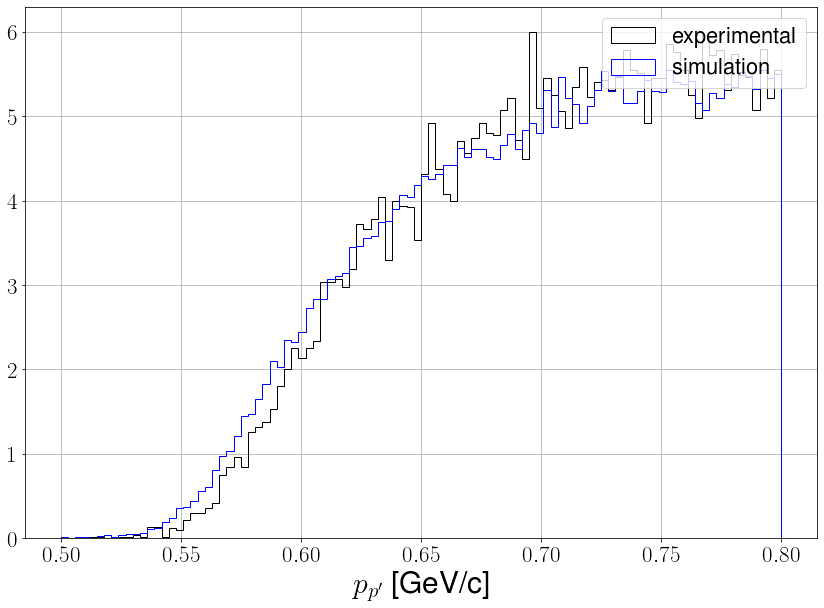

In [163]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
(pi0ExpOutbFD.Pp).hist(bins = np.linspace(0.5, 0.8, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
pi0SimOutbFD.Pp.hist(bins = np.linspace(0.5, 0.8, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$p_{p'}$" + " ["+GeVc+"]")
plt.show()

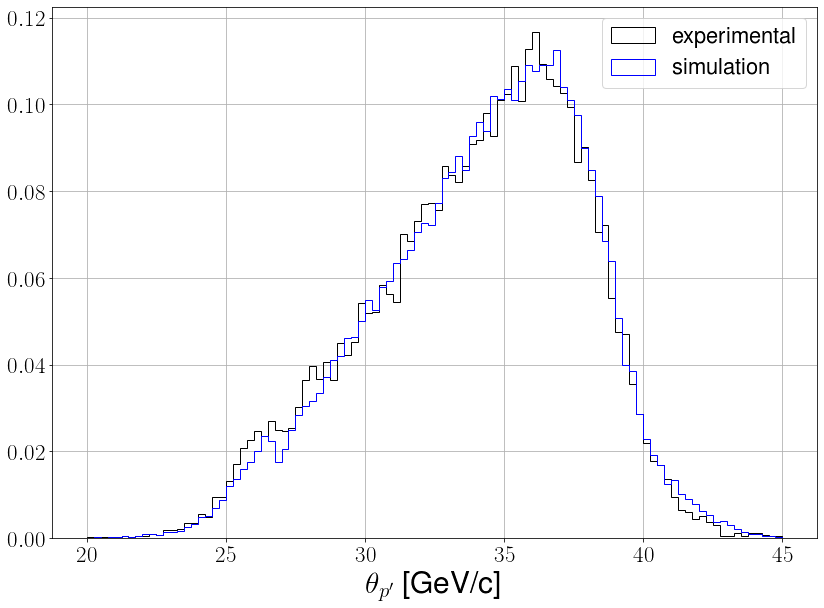

In [185]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
(pi0ExpOutbFD.Ptheta).hist(bins = np.linspace(20, 45, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
pi0SimOutbFD.Ptheta.hist(bins = np.linspace(20, 45, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$\theta_{p'}$" + " ["+GeVc+"]")
plt.show()

In [164]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_FDrevisited/outb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_FDrevisited/outb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/nov2021/convPkl_FDrevisited/outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Jan2022/convPkl_outb/exp/"
# parent_exp = "/Volumes/Extreme SSD/nov2021/convPkl_FDrevisited/outb/exp/"

df_4240_corr = pd.read_pickle(parent_MC + "4240_0.pkl")
df_4243_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4243_0.pkl")
df_4243_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4243_0.pkl")
exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

# parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/outb/dvcs/"
# parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/outb/bkg_1g/"
# parent_MC_bkg2g = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/outb/bkg_2g/"
# parent_exp = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/outb/exp/"

# df_4240_corr = pd.read_pickle(parent_MC + "4240.pkl")
# df_4243_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
# df_4243_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")

In [186]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/outb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/outb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/outb/exp/"

df_4240_corr = pd.read_pickle(parent_MC + "4240.pkl")
df_4243_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
df_4243_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")

exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [187]:
epgExpOutb = copy(exp_1g_corr)
pi0ExpOutb = copy(exp_2g_corr)
dvcsSimOutb = df_4240_corr
bkgSimOutb = df_4243_1g_corr
pi0SimOutb = df_4243_2g_corr

In [188]:
epgExpOutbCDFT = epgExpOutb.loc[epgExpOutb.config == 3]
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config == 3]
bkgSimOutbCDFT = bkgSimOutb.loc[bkgSimOutb.config == 3]
pi0ExpOutbCDFT = pi0ExpOutb.loc[(pi0ExpOutb.config == 3)& (pi0ExpOutb.Pp < 0.8)]
pi0SimOutbCDFT = pi0SimOutb.loc[(pi0SimOutb.config == 3)& (pi0SimOutb.Pp < 0.8)]

epgExpOutbCD = epgExpOutb.loc[epgExpOutb.config == 2]
dvcsSimOutbCD = dvcsSimOutb.loc[dvcsSimOutb.config == 2]
bkgSimOutbCD = bkgSimOutb.loc[bkgSimOutb.config == 2]
pi0ExpOutbCD = pi0ExpOutb.loc[(pi0ExpOutb.config == 2)& (pi0ExpOutb.Pp < 0.8)]
pi0SimOutbCD = pi0SimOutb.loc[(pi0SimOutb.config == 2)& (pi0SimOutb.Pp < 0.8)]

epgExpOutbFD = epgExpOutb.loc[epgExpOutb.config == 1]
dvcsSimOutbFD = dvcsSimOutb.loc[dvcsSimOutb.config == 1]
bkgSimOutbFD = bkgSimOutb.loc[bkgSimOutb.config == 1]
pi0ExpOutbFD = pi0ExpOutb.loc[(pi0ExpOutb.config == 1)& (pi0ExpOutb.Pp < 0.8)]
pi0SimOutbFD = pi0SimOutb.loc[(pi0SimOutb.config == 1)& (pi0SimOutb.Pp < 0.8)]

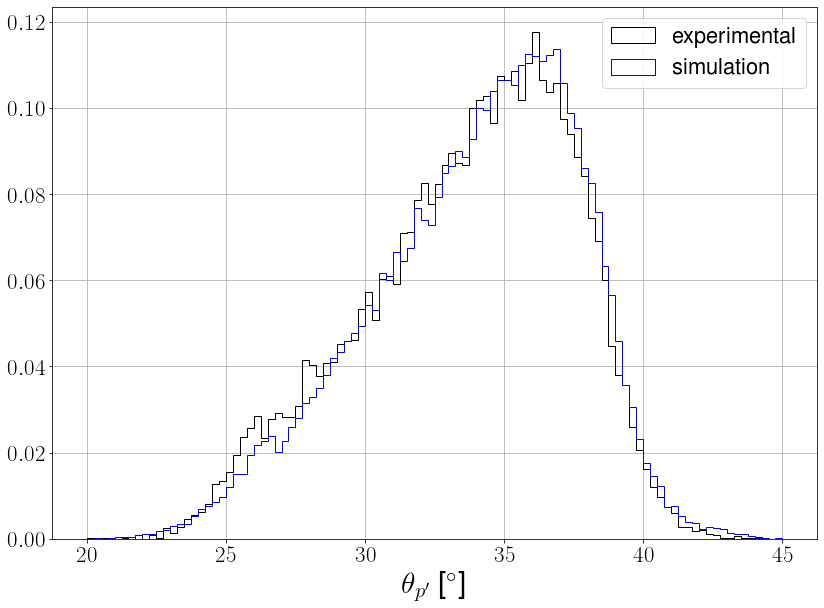

In [190]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
(pi0ExpOutbFD.Ptheta).hist(bins = np.linspace(20, 45, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
pi0SimOutbFD.Ptheta.hist(bins = np.linspace(20, 45, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$\theta_{p'}$" + " ["+degree+"]")
plt.show()

In [194]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_outb_nocorr/outb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_outb_nocorr/outb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/nov2021/convPkl_outb_nocorr/outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/nov2021/convPkl_outb_nocorr/outb/exp/"

df_4240_corr = pd.read_pickle(parent_MC + "4240.pkl")
df_4243_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
df_4243_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")

exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [195]:
epgExpOutb = copy(exp_1g_corr)
pi0ExpOutb = copy(exp_2g_corr)
dvcsSimOutb = df_4240_corr
bkgSimOutb = df_4243_1g_corr
pi0SimOutb = df_4243_2g_corr

In [196]:
epgExpOutbCDFT = epgExpOutb.loc[epgExpOutb.config == 3]
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config == 3]
bkgSimOutbCDFT = bkgSimOutb.loc[bkgSimOutb.config == 3]
pi0ExpOutbCDFT = pi0ExpOutb.loc[(pi0ExpOutb.config == 3)& (pi0ExpOutb.Pp < 0.8)]
pi0SimOutbCDFT = pi0SimOutb.loc[(pi0SimOutb.config == 3)& (pi0SimOutb.Pp < 0.8)]

epgExpOutbCD = epgExpOutb.loc[epgExpOutb.config == 2]
dvcsSimOutbCD = dvcsSimOutb.loc[dvcsSimOutb.config == 2]
bkgSimOutbCD = bkgSimOutb.loc[bkgSimOutb.config == 2]
pi0ExpOutbCD = pi0ExpOutb.loc[(pi0ExpOutb.config == 2)& (pi0ExpOutb.Pp < 0.8)]
pi0SimOutbCD = pi0SimOutb.loc[(pi0SimOutb.config == 2)& (pi0SimOutb.Pp < 0.8)]

epgExpOutbFD = epgExpOutb.loc[epgExpOutb.config == 1]
dvcsSimOutbFD = dvcsSimOutb.loc[dvcsSimOutb.config == 1]
bkgSimOutbFD = bkgSimOutb.loc[bkgSimOutb.config == 1]
pi0ExpOutbFD = pi0ExpOutb.loc[(pi0ExpOutb.config == 1)& (pi0ExpOutb.Pp < 0.8)]
pi0SimOutbFD = pi0SimOutb.loc[(pi0SimOutb.config == 1)& (pi0SimOutb.Pp < 0.8)]

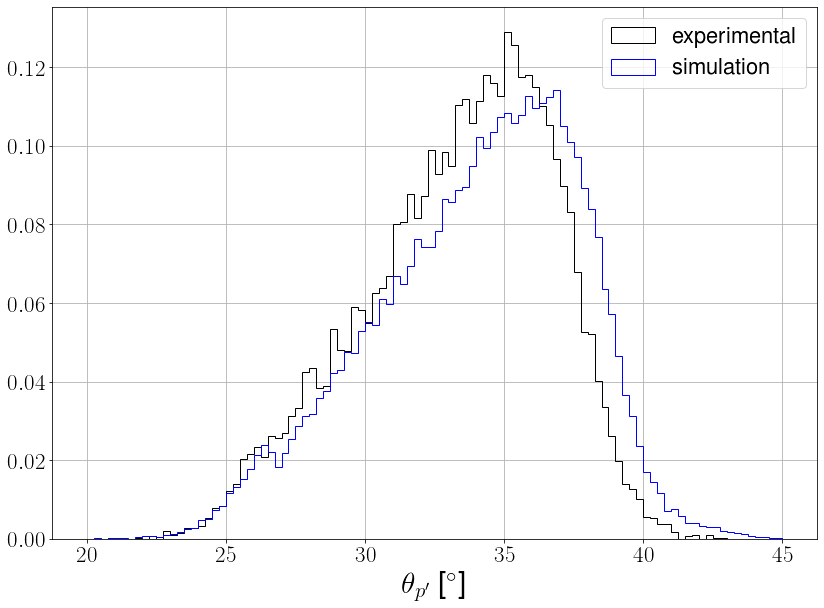

In [197]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
(pi0ExpOutbFD.Ptheta).hist(bins = np.linspace(20, 45, 101), density = True, histtype = 'step', color = 'k', label = 'experimental')
pi0SimOutbFD.Ptheta.hist(bins = np.linspace(20, 45, 101), density = True, histtype = 'step', color = 'b', label = 'simulation')
plt.legend(loc='upper right')
plt.xlabel(r"$\theta_{p'}$" + " ["+degree+"]")
plt.show()